In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import sys
from mpl_toolkits.mplot3d import Axes3D

In [3]:
def surf(data):
    y = np.arange(0, data.shape[0])
    x = np.arange(0, data.shape[1])
    X, Y = np.meshgrid(x, y)

    fig = plt.figure()
    ax = fig.gca(projection='3d')

    ax.plot_surface(X, Y, data, rstride=1, cstride=1, linewidth=0,
                    cmap='jet', antialiased=False)

    plt.show(block=False)


def LoG(size, sigma):
    x = y = np.linspace(-size, size, 2*size+1)
    x, y = np.meshgrid(x, y)

    f = (x**2 + y**2)/(2*sigma**2)
    k = -1./(np.pi * sigma**4) * (1 - f) * np.exp(-f)

    return k



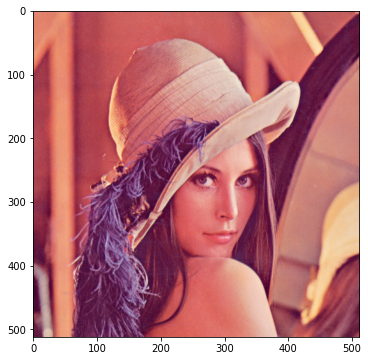

In [52]:
# Edge demo

# Read Lena image
lenaL = cv2.imread('images/lena.png')
size = (6, 6)
plt.figure(figsize=(size)) 
plt.imshow(lenaL[:, :, ::-1])

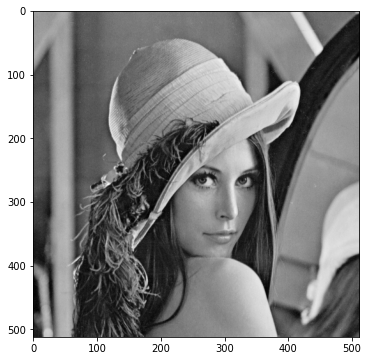

In [53]:
# Convert to monochrome (grayscale) using BGR2GRAY.
lenaMono = cv2.cvtColor(lenaL, cv2.COLOR_BGR2GRAY)  # TODO: change this line with the call to cv2.cvtColor
plt.figure(figsize=(size)) 
plt.imshow(lenaMono, cmap='binary_r')

h:
 [[0.00667071 0.00830183 0.00970583 0.01065977 0.01099814 0.01065977
  0.00970583 0.00830183 0.00667071]
 [0.00830183 0.0103318  0.0120791  0.01326629 0.01368741 0.01326629
  0.0120791  0.0103318  0.00830183]
 [0.00970583 0.0120791  0.0141219  0.01550987 0.0160022  0.01550987
  0.0141219  0.0120791  0.00970583]
 [0.01065977 0.01326629 0.01550987 0.01703426 0.01757498 0.01703426
  0.01550987 0.01326629 0.01065977]
 [0.01099814 0.01368741 0.0160022  0.01757498 0.01813287 0.01757498
  0.0160022  0.01368741 0.01099814]
 [0.01065977 0.01326629 0.01550987 0.01703426 0.01757498 0.01703426
  0.01550987 0.01326629 0.01065977]
 [0.00970583 0.0120791  0.0141219  0.01550987 0.0160022  0.01550987
  0.0141219  0.0120791  0.00970583]
 [0.00830183 0.0103318  0.0120791  0.01326629 0.01368741 0.01326629
  0.0120791  0.0103318  0.00830183]
 [0.00667071 0.00830183 0.00970583 0.01065977 0.01099814 0.01065977
  0.00970583 0.00830183 0.00667071]]


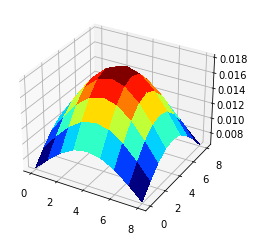

In [68]:
# Make a blurred/smoothed version. Use cv2.getGaussianKernel to get the h kernel
ksize = 9
sigma = 4

h = cv2.getGaussianKernel(ksize, sigma)  # TODO: change this line with the call to cv2.getGaussianKernel
h = h * h.T
print('h:\n', h)

# Mimic Matlab's surf(h)
surf(h)

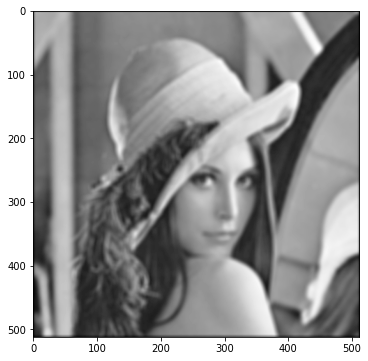

In [61]:
# Use cv2.filter2D with BORDER_CONSTANT to get results similar to the Matlab demo
# TODO: use cv2.filter2D
lenaSmooth = cv2.filter2D(lenaMono, -1, h, borderType=cv2.BORDER_CONSTANT)
plt.figure(figsize=(size)) 
plt.imshow(lenaSmooth, cmap='binary_r')

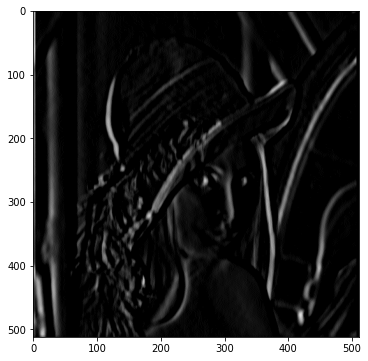

In [55]:
# Method 1: Shift left and right, and show diff image

lenaL = np.copy(lenaSmooth)  # Let's use np.copy to avoid modifying the original array
# TODO: use numpy indexing to copy and paste the array to the left position
shift = 1
lenaL = lenaL[:, :lenaL.shape[1]-shift]

lenaR = np.copy(lenaSmooth)  # Let's use np.copy to avoid modifying the original array
# TODO: use numpy indexing to copy and paste the array to the right position
lenaR = lenaR[:, shift:]

# TODO: Subtract lenaL from lenaR. Don't forget about using the correct data type
lenaDiff = cv2.subtract(lenaR, lenaL)  # Change this line with the answer


plt.figure(figsize=(size)) 
plt.imshow(lenaDiff, cmap='binary_r')

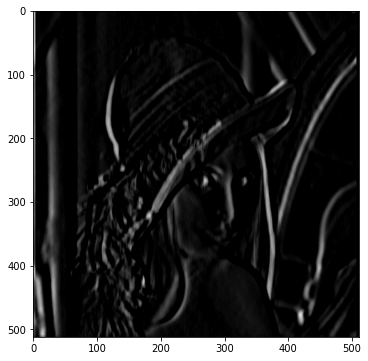

In [56]:
# Here we shift the value range to fit [0, 255] and make sure the data type is uint8 in 
# order to display the results.
lenaDiff = cv2.normalize(lenaDiff, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)
plt.figure(figsize=(size)) 
plt.imshow(lenaDiff.astype(np.uint8), cmap='binary_r')

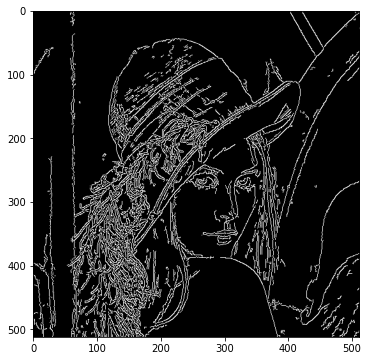

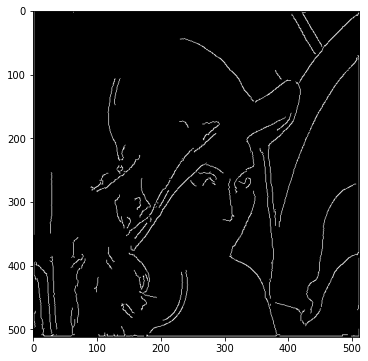

In [58]:
# Method 2: Canny edge detector
# OpenCV doesn't have a function similar to edge but it does have a Canny Edge detector
# OpenCV needs you to specify low and high threshold values. While these are not the
# exactly the same as the ones used in the demo you should refer to the lines below
# as a reference on how cv2.Canny works

thresh1 = 110
thresh2 = 60
threshes = (thresh1, thresh2)

# TODO: use cv2.Canny with lenaMono, lenaSmooth and the thresholds defined above
lenas = [lenaMono, lenaSmooth]
for lena in lenas:
    cannyEdges = cv2.Canny(lena, *threshes)  
    plt.figure(figsize=(size))
    plt.imshow(cannyEdges, cmap='binary_r')

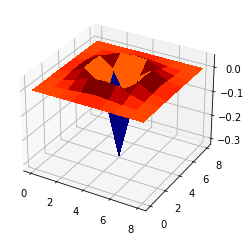

In [62]:
# Method 3: Laplacian of Gaussian
h = LoG(4, 1.)
surf(h)

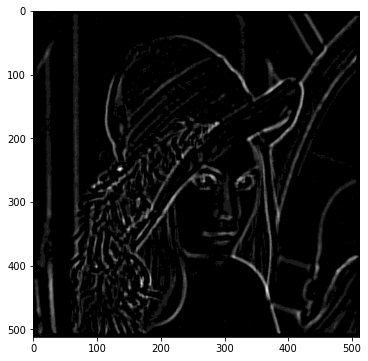

In [66]:
# Let's use cv2.filter2D with the new h
# TODO: use cv2.filter2D
logEdges = cv2.filter2D(lenaSmooth, -1, h, borderType=cv2.BORDER_CONSTANT)
logEdgesShow = cv2.normalize(logEdges, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)

plt.figure(figsize=(size))
plt.imshow(logEdgesShow.astype(np.uint8), cmap='binary_r')

# OpenCV doesn't have a function edge like Matlab that implements a 'log' method. This would
# have to be implemented from scratch. This may take a little more time to implement this :).